In [1]:
import numpy as np
import sys
sys.path.append("../..")
import lib.haar_wawelet_method.gradients as grad
import lib.data as data
import matplotlib.pyplot as plt
import lib.mesurements
import lib.haar_wawelet_method.haar as haar
%matplotlib inline

In [2]:
def draw_plot(z):
    size = z.shape[0]
    x,y = np.meshgrid(range(0,size),range(0,size))
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(30,30))
    ax = fig.gca(projection='3d')
    ax.plot_wireframe(x, y, z)
    ax.set_zlim(0, 2)
    ax.set_xlim(0,size)
    ax.set_ylim(0,size)
    from matplotlib.ticker import MultipleLocator, FormatStrFormatter
    majorLocator = MultipleLocator(2)
    majorFormatter = FormatStrFormatter('%d')
    ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_major_formatter(majorFormatter)
    ax.yaxis.set_major_locator(majorLocator)
    ax.yaxis.set_major_formatter(majorFormatter)

In [4]:
from ReportTools.WaweletMethodFrequencyCharackteristickExperiment import WaweletMethodFrequencyCharackteristickExperiment

In [5]:
ex = WaweletMethodFrequencyCharackteristickExperiment("256*256grid_with_noise", grid_degree=7)

Write description to experiment: 256  * 256 grid


In [6]:
ex.execute(noised=True, photons=0.3)

N/A% (0 of 169) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--../lib/data.py:45: RuntimeWarning: divide by zero encountered in double_scalars
  scale_factor = photons / noised_image.max()
../lib/data.py:46: RuntimeWarning: invalid value encountered in multiply
  noised_image = noised_image * scale_factor
../lib/data.py:47: RuntimeWarning: invalid value encountered in less
  noised_image = np.random.poisson(noised_image)
../lib/data.py:47: RuntimeWarning: invalid value encountered in greater
  noised_image = np.random.poisson(noised_image)
100% (169 of 169) |#######################| Elapsed Time: 0:01:18 Time: 0:01:18


array([[1.        , 1.14392416, 0.92511008, 0.89846057, 1.13587566,
        0.96473178, 1.0306189 , 0.94865573, 0.96620015, 1.04537337,
        1.01893794, 0.98317038, 1.02210364],
       [0.9405958 , 0.41267449, 0.75583339, 0.78657365, 0.79166744,
        1.09025783, 0.84670312, 1.17826611, 0.983576  , 0.95760708,
        0.98343802, 1.03282162, 1.03958633],
       [1.04611902, 1.35513308, 0.91749898, 0.79713604, 0.79514363,
        0.78343555, 0.98562394, 0.91894251, 0.91944455, 1.11437753,
        1.17599534, 0.98706148, 1.00687745],
       [0.93172288, 1.12795084, 0.86548078, 1.25921489, 0.77169945,
        0.87857049, 1.02812845, 1.11556277, 1.14821016, 1.03292319,
        0.98115166, 1.06722269, 0.97209063],
       [1.10305869, 0.87560163, 0.91543876, 0.77579476, 1.13256111,
        1.16443006, 0.86344008, 1.0898087 , 1.1642175 , 1.03060832,
        1.0679893 , 0.91710811, 1.04787829],
       [1.06389602, 0.82519333, 1.23594497, 1.02348727, 1.15192762,
        1.27087129, 0.91055

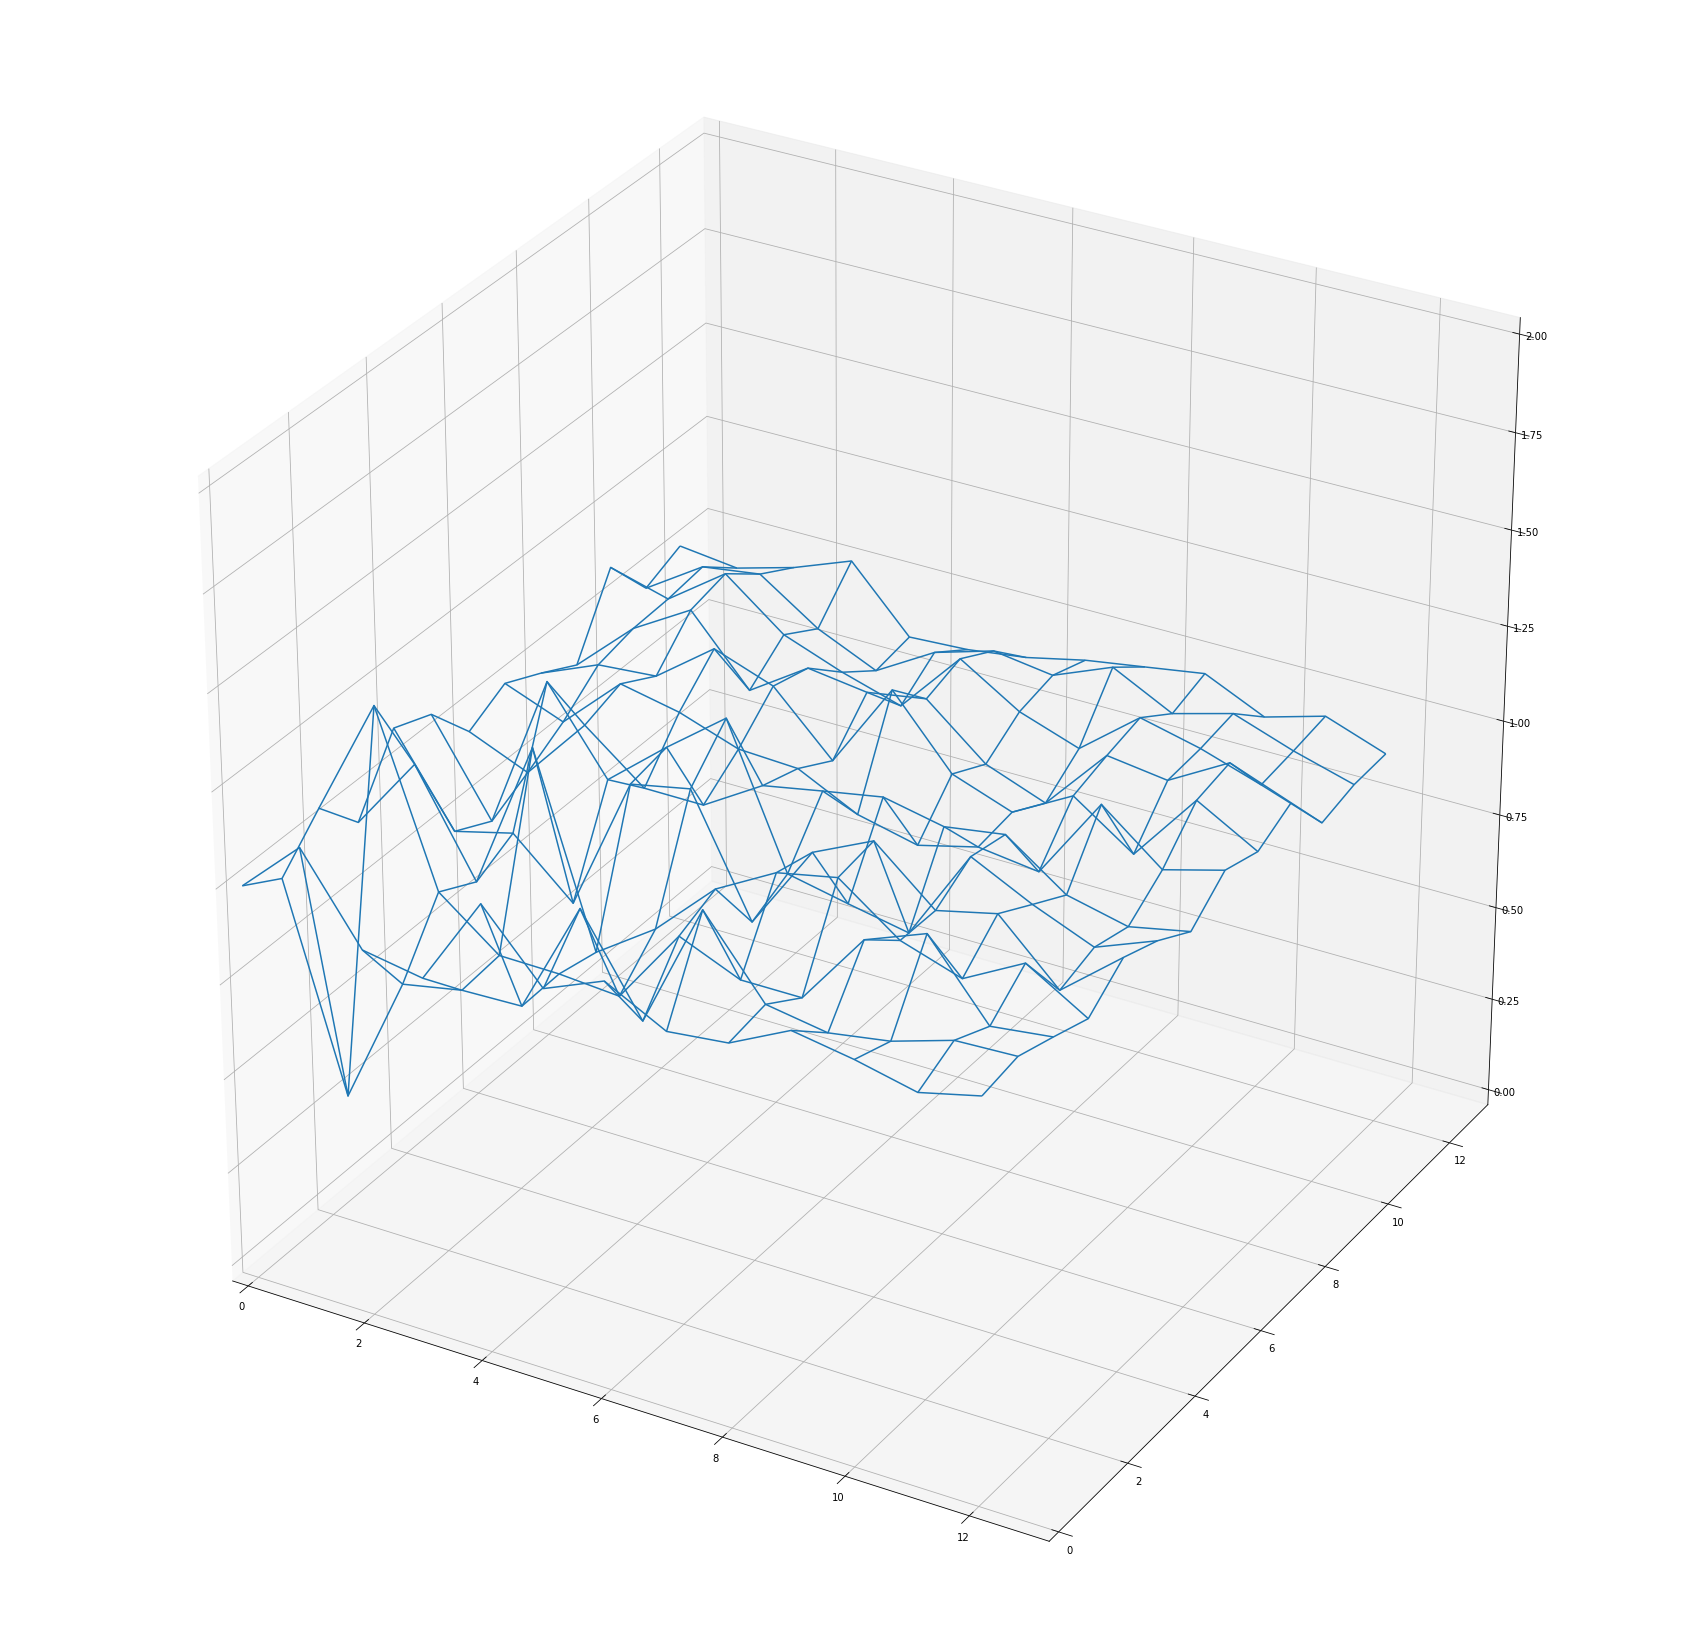

In [7]:
ex.draw_plot()

In [7]:
def compare_ideal(i,j,M, noised = False, photons = 1):
    x,y = data.get_plane(-np.pi, np.pi,-np.pi,np.pi,M)
    im = my_exp(x,y,i,j)
    grad_X, grad_Y = i * x * 1j * my_exp(x,y,i,j), j * y * 1j * my_exp(x,y,i,j)
    if (noised):
        #как зашумлять комплексные числа?
        grad_X = poisson_noised(grad_X.real, photons) + 1j*poisson_noised(grad_X.imag, photons)
        grad_Y = poisson_noised(grad_Y.real, photons) + 1j*poisson_noised(grad_Y.imag, photons)
    LH, HL, HH = haar.analyze(grad_X, grad_Y, grad_X, grad_Y)
    res = haar.syntesis({0:np.array([[np.mean(im)*2**M]])}, LH, HL, HH,M)
    return np.abs(np.fft.fft2(im)[j,i])/np.abs(np.fft.fft2(res[M])[j,i])

In [8]:
ex.save()

Write report to experiment: в нуле как то плохо. нужно проверить 
/home/satbek/Course-work-sem7/ExperimentResults/WaweletMethodFrequencyCharackteristickExperiment/256*256grid_with_noise1522836434.702897
